In [ ]:
# Loading files from local system
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Reading the data
df = pd.read_csv('/content/creditcard.csv.zip') 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()
#There are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# COUNTING The unique values of Class column

df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


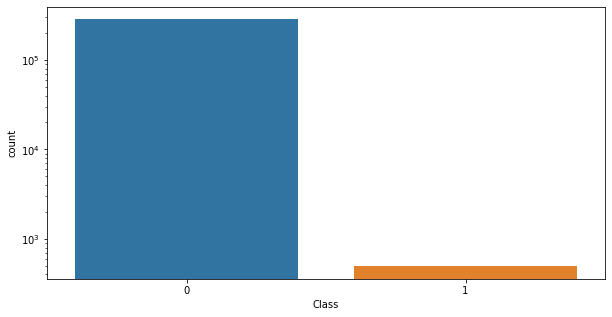

In [ ]:
# Ploting the count Size
plt.figure(figsize=(10,5))
sns.countplot(df['Class'], log=True)

# Valid Caes = 0 >> Fraud Cases = 1

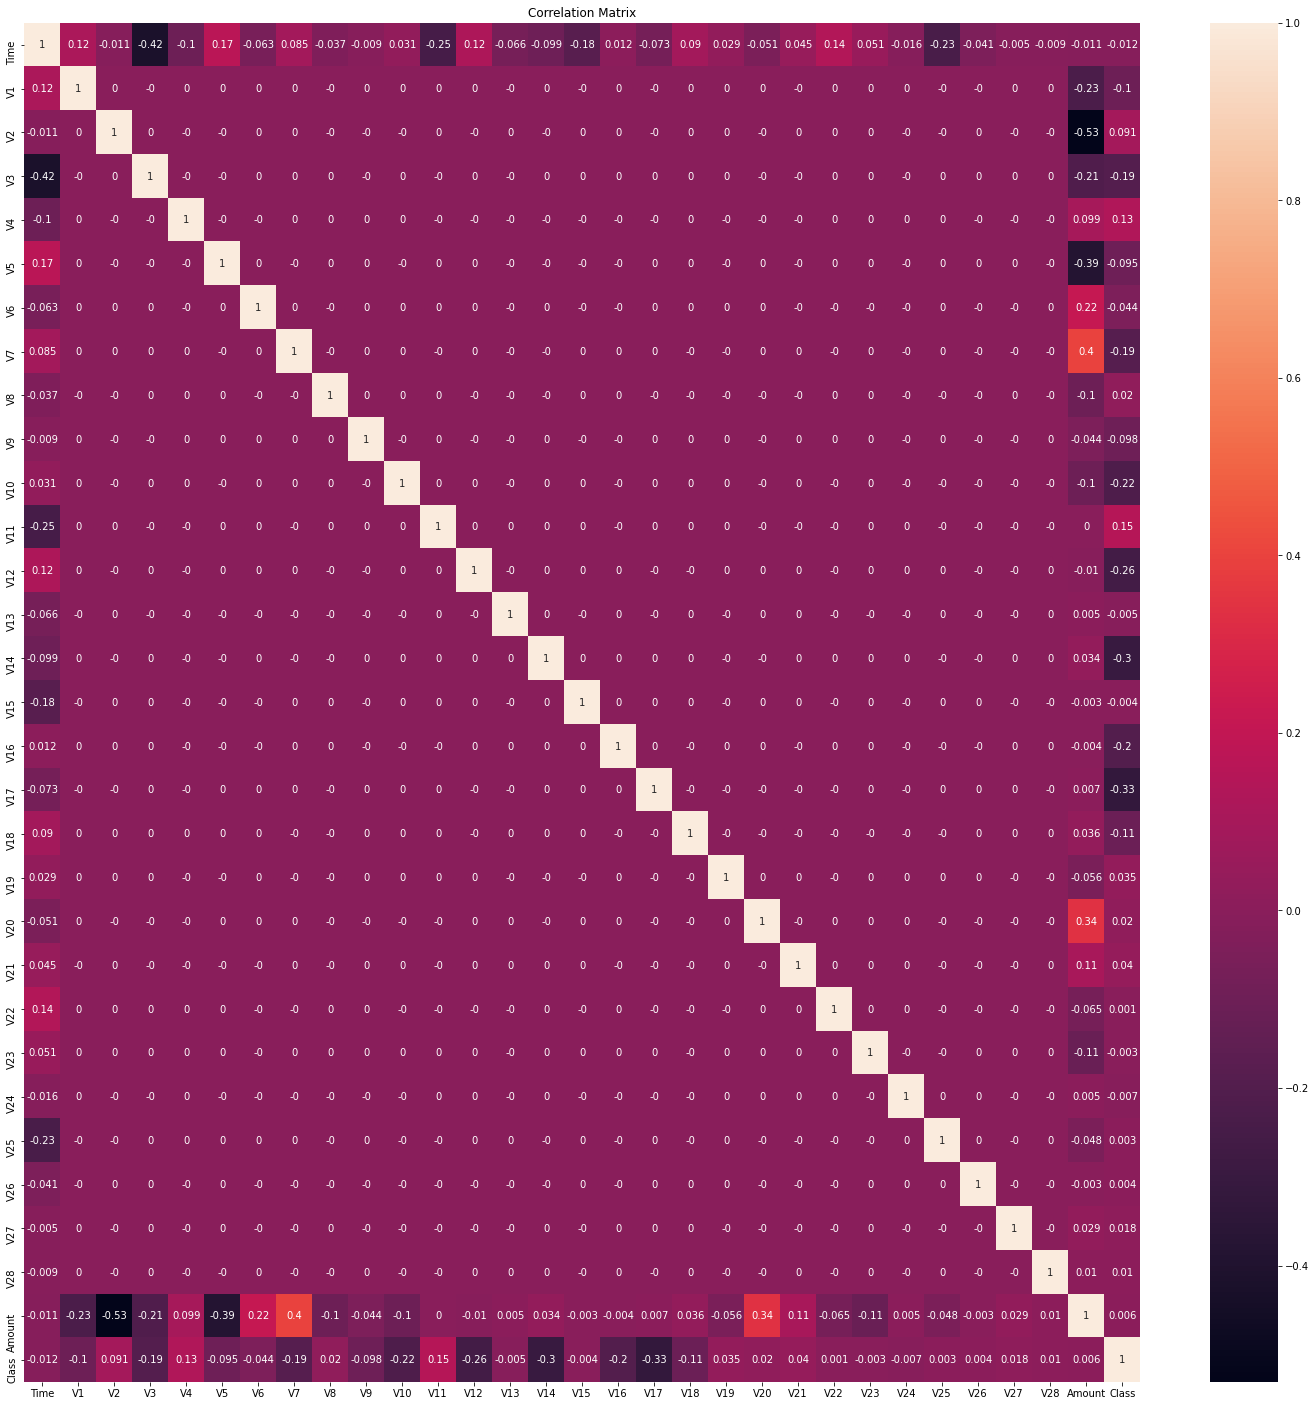

In [ ]:
plt.figure(figsize=(25,25))
plt.title('Correlation Matrix')
sns.heatmap(round(df.corr(),3),annot=True)
plt.show()

# Cleckng Corr between Dependent and Independent Variables

In [ ]:

df.corr()[['Class']]

,Class
Time,-0.012323
V1,-0.101347
V2,0.091289
V3,-0.192961
V4,0.133447
V5,-0.094974
V6,-0.043643
V7,-0.187257
V8,0.019875
V9,-0.097733


In [ ]:
#Independent Variable
X = df.iloc[:,:-1] # FEATURE

#Dependent Varaible

y = df.iloc[:,-1] #LABEL

In [ ]:
# Splitting the Data

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size= .25, 
                                                    random_state=10)

###  Standard scalar

In [ ]:

SC= StandardScaler()

X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(213605, 30)
(71202, 30)


# Logistic Regression

In [ ]:
lg_model = LogisticRegression()


lg_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
training_score= lg_model.score(X_train,y_train)
testing_score = lg_model.score(X_test,y_test)



In [ ]:
# Checking the GENERALISATION of the model
print("Training Score : {}".format(training_score))

print("Testing Score : {}".format(testing_score))


# Here the model is generalised

Training Score : 0.999133915404602
Testing Score : 0.9992415943372377


Classifiction Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.87      0.65      0.75       121

    accuracy                           1.00     71202
   macro avg       0.93      0.83      0.87     71202
weighted avg       1.00      1.00      1.00     71202

*****************************************************************************************************
 Accuracy Score:  0.9992415943372377
*****************************************************************************************************


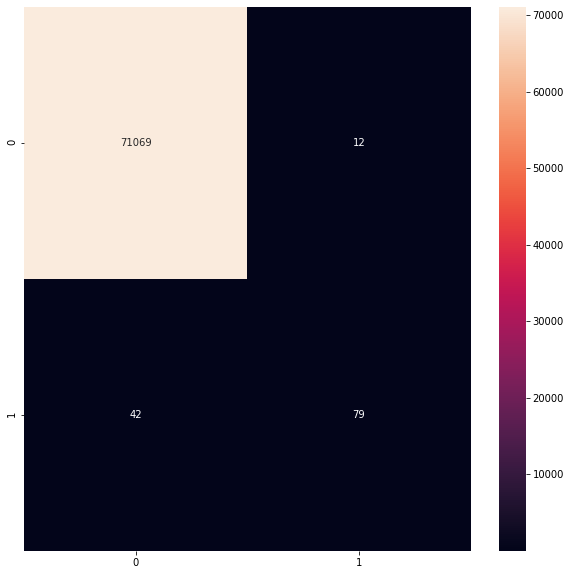

In [ ]:
# Prediction

pred = lg_model.predict(X_test)


print("Classifiction Report : \n {}".format(classification_report(y_test,pred)))
print("*"*101)

print(" Accuracy Score:  {}".format(accuracy_score(y_test, pred)))
print("*"*101)

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g')

# Random Forest Classifier



In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)


training_score2= rf_model.score(X_train,y_train)
testing_score2 = rf_model.score(X_test,y_test)

In [ ]:
# Checking the GENERALISATION of the model
print("Training Score : {}".format(training_score))

print("Testing Score : {}".format(testing_score))


Training Score : 0.999133915404602
Testing Score : 0.9992415943372377


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.96      0.80      0.87       121

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202

^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Accuracy Score:  0.9996067526193084
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



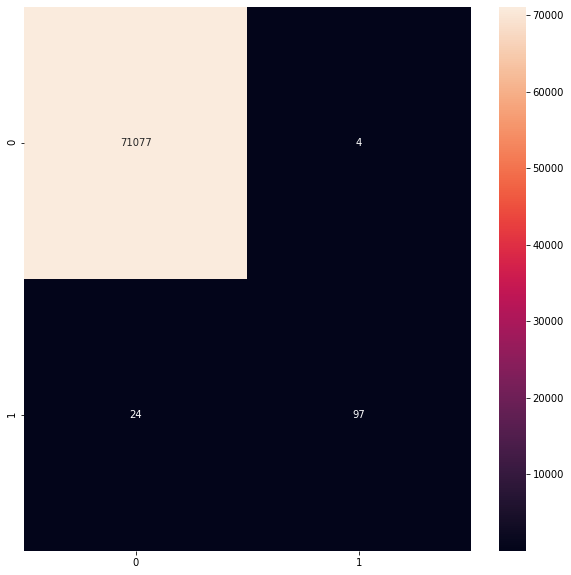

In [ ]:
#  Prediction
pred = rf_model.predict(X_test)


print('Classification Report: \n', classification_report(y_test, pred))
print("^^" * 100)
print()
print('Accuracy Score: ', accuracy_score(y_test, pred))
print("^^" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

# Accuracy Score:  0.9996067526193084